# Introduction

The data set includes variables such as the number of pregnancies the patient has had, her BMI, blood pressure level, insulin level, age, outcome variable which is intended to predict whether the patient has diabetes, and other variables contained in the csv file.

The people surveyed in this particular dataset include women aged 21 and over.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/kaggle/input/diabetes-dataset/diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.describe(include='all')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Data Cleaning & EDA

In [7]:
df.rename(columns={
    'BloodPressure': 'Blood Pressure',
    'SkinThickness': 'Skin Thickness',
    'DiabetesPedigreeFunction': 'Diabetes Pedigree Function'
}, inplace=True)

### Pregnancies

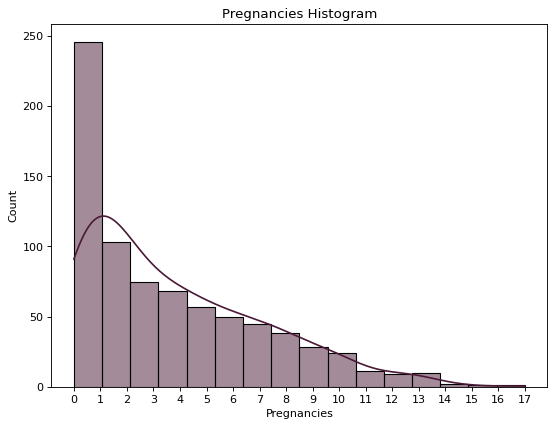

In [8]:
plt.figure(figsize=(8, 6), dpi=80)
sns.histplot(data = df, x='Pregnancies', kde=True, color="#4a1936")
plt.xticks(range(18))
plt.title('Pregnancies Histogram')
plt.show()

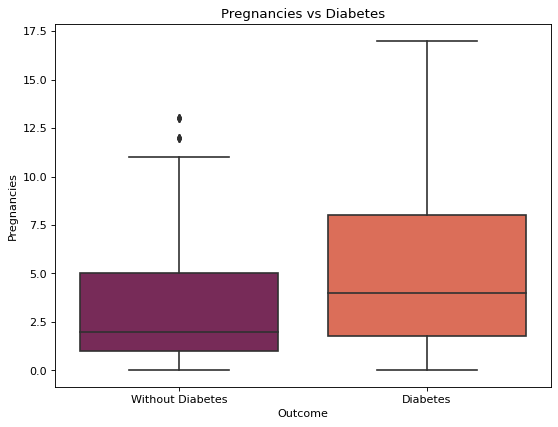

In [9]:
plt.figure(figsize=(8, 6), dpi=80)
sns.boxplot(data = df, x = 'Outcome', y = 'Pregnancies', palette='rocket').set_xticklabels(['Without Diabetes', 'Diabetes'])
plt.title('Pregnancies vs Diabetes')
plt.show()

Diabetes is more common in women who have had more pregnancies

### Glucose

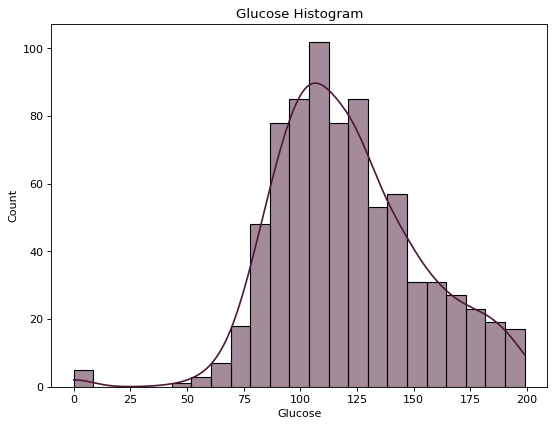

In [10]:
plt.figure(figsize=(8, 6), dpi=80)
sns.histplot(data = df, x='Glucose', color="#4a1936", kde=True)
plt.title('Glucose Histogram')
plt.show()

In [11]:
df[df['Glucose']<25]

,Pregnancies,Glucose,Blood Pressure,Skin Thickness,Insulin,BMI,Diabetes Pedigree Function,Age,Outcome
75,1,0,48,20,0,24.7,0.140,22,0
182,1,0,74,20,23,27.7,0.299,21,0
342,1,0,68,35,0,32.0,0.389,22,0
349,5,0,80,32,0,41.0,0.346,37,1
502,6,0,68,41,0,39.0,0.727,41,1


In [12]:
glucose_mean = np.mean(df['Glucose'])
df['Glucose'] = df['Glucose'].apply(lambda x: 121 if x<25 else x)

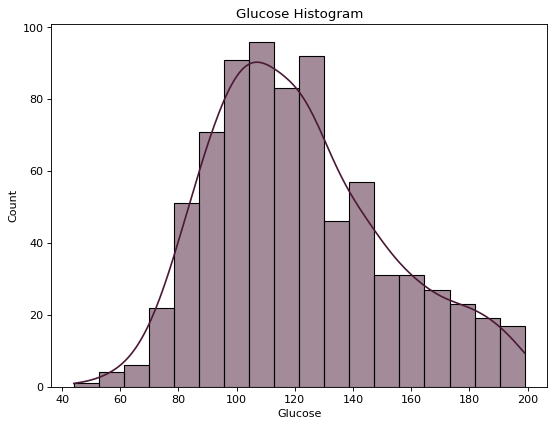

In [13]:
plt.figure(figsize=(8, 6), dpi=80)
sns.histplot(data = df, x='Glucose', color="#4a1936", kde=True)
plt.title('Glucose Histogram')
plt.show()

### Glucose vs Outcome

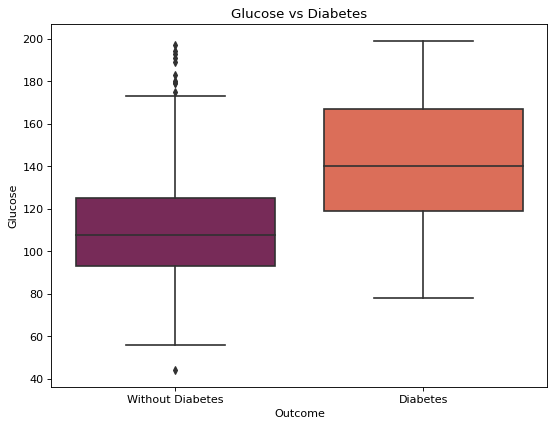

In [14]:
plt.figure(figsize=(8, 6), dpi=80)
sns.boxplot(data = df, x = 'Outcome', y = 'Glucose', palette='rocket').set_xticklabels(['Without Diabetes', 'Diabetes'])
plt.title('Glucose vs Diabetes')
plt.show()

People with diabetes have much higher blood glucose levels

### Blood Pressure

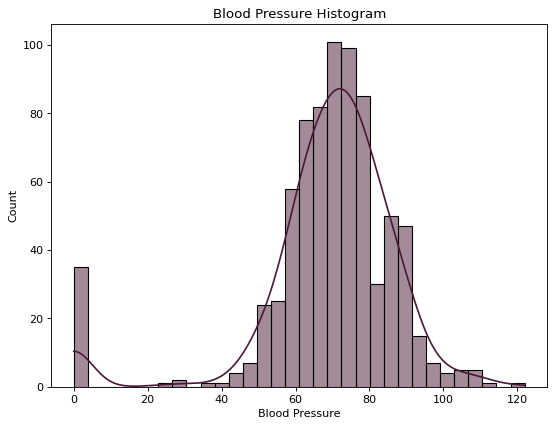

In [15]:
plt.figure(figsize=(8, 6), dpi=80)
sns.histplot(data = df, x='Blood Pressure', color="#4a1936", kde=True)
plt.title('Blood Pressure Histogram')
plt.show()

In [16]:
np.mean(df['Blood Pressure'])

69.10546875

In [17]:
df['Blood Pressure'] = df['Blood Pressure'].apply(lambda x: 69 if x<10 else x)

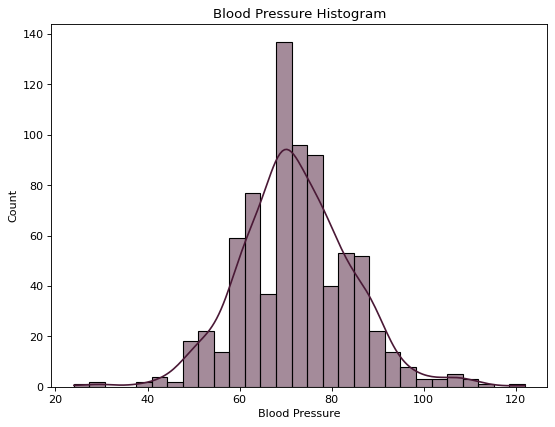

In [18]:
plt.figure(figsize=(8, 6), dpi=80)
sns.histplot(data = df, x='Blood Pressure', color="#4a1936", kde=True)
plt.title('Blood Pressure Histogram')
plt.show()

### Blood Pressure vs Outcome

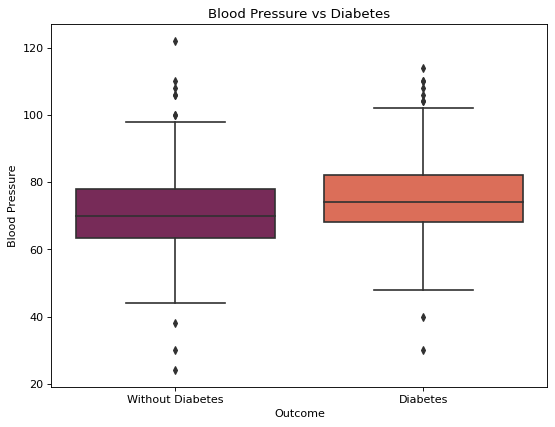

In [19]:
plt.figure(figsize=(8, 6), dpi=80)
sns.boxplot(data = df, x = 'Outcome', y = 'Blood Pressure', palette='rocket').set_xticklabels(['Without Diabetes', 'Diabetes'])
plt.title('Blood Pressure vs Diabetes')
plt.show()

People with diabetes have slightly higher blood pressure

### Skin Thickness

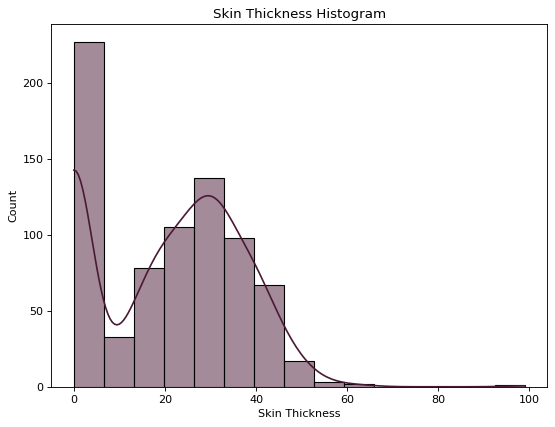

In [20]:
plt.figure(figsize=(8, 6), dpi=80)
sns.histplot(data = df, x='Skin Thickness', color="#4a1936", kde=True)
plt.title('Skin Thickness Histogram')
plt.show()

### Skin Thickness vs Outcome

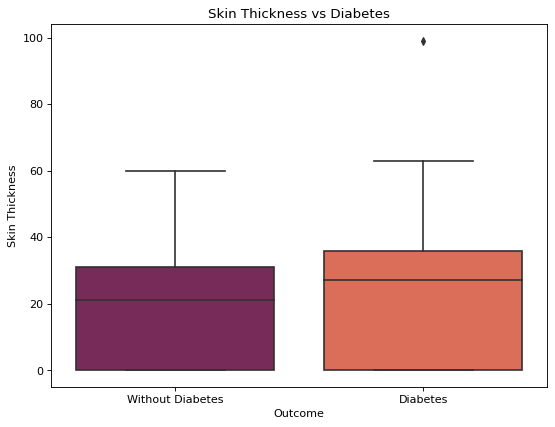

In [21]:
plt.figure(figsize=(8, 6), dpi=80)
sns.boxplot(data = df, x = 'Outcome', y = 'Skin Thickness', palette='rocket').set_xticklabels(['Without Diabetes', 'Diabetes'])
plt.title('Skin Thickness vs Diabetes')
plt.show()

### Insulin

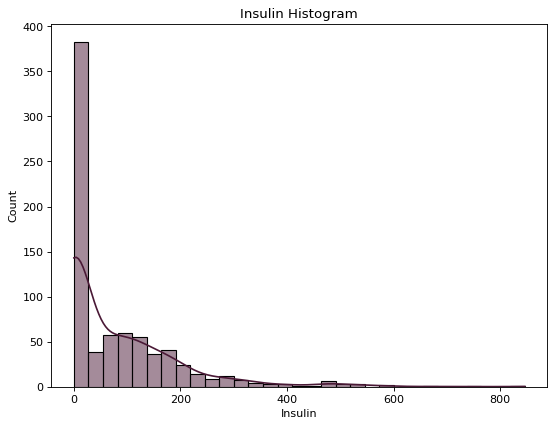

In [22]:
plt.figure(figsize=(8, 6), dpi=80)
sns.histplot(data = df, x='Insulin', color="#4a1936", kde=True)
plt.title('Insulin Histogram')
plt.show()

### Insulin vs Outcome

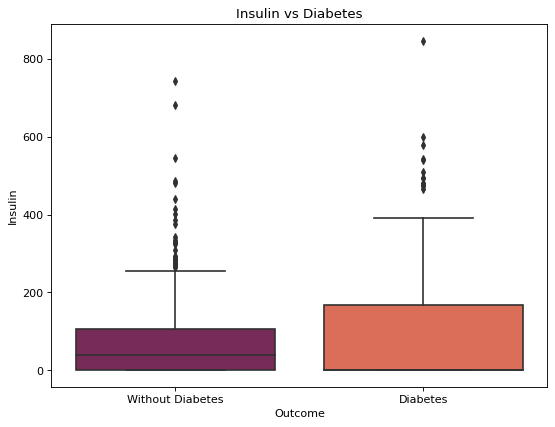

In [23]:
plt.figure(figsize=(8, 6), dpi=80)
sns.boxplot(data = df, x = 'Outcome', y = 'Insulin', palette='rocket').set_xticklabels(['Without Diabetes', 'Diabetes'])
plt.title('Insulin vs Diabetes')
plt.show()

### BMI

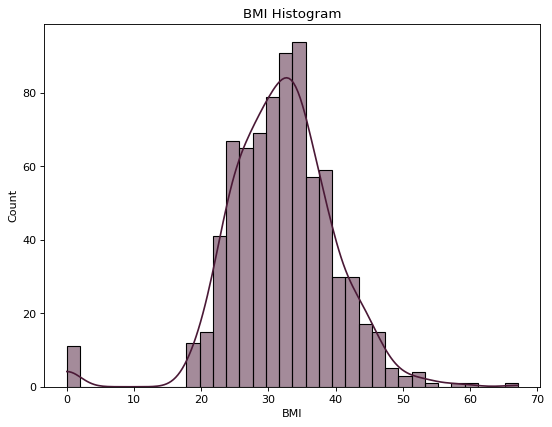

In [24]:
plt.figure(figsize=(8, 6), dpi=80)
sns.histplot(data = df, x='BMI', color="#4a1936", kde=True)
plt.title('BMI Histogram')
plt.show()

In [25]:
print('Mean: ' + str(np.mean(df['BMI'])))

Mean: 31.992578124999998


In [26]:
df['BMI'] = df['BMI'].apply(lambda x: 32 if x<10 else x)

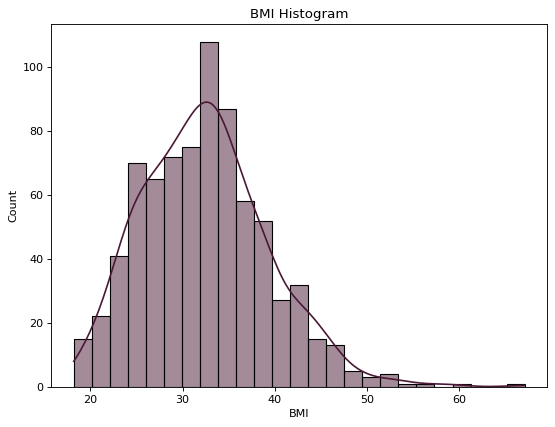

In [27]:
plt.figure(figsize=(8, 6), dpi=80)
sns.histplot(data = df, x='BMI', color="#4a1936", kde=True)
plt.title('BMI Histogram')
plt.show()

### BMI vs Outcome

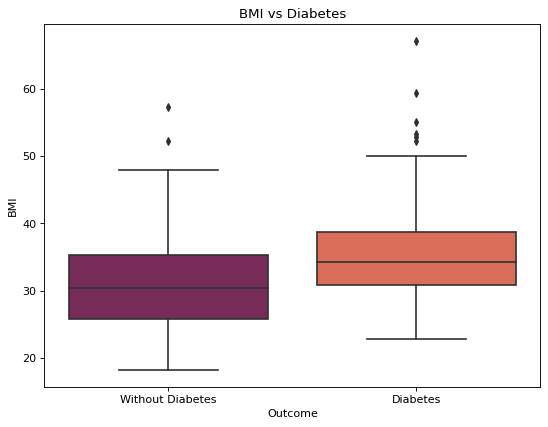

In [28]:
plt.figure(figsize=(8, 6), dpi=80)
sns.boxplot(data = df, x = 'Outcome', y = 'BMI', palette='rocket').set_xticklabels(['Without Diabetes', 'Diabetes'])
plt.title('BMI vs Diabetes')
plt.show()

People with diabetes have higher BMI

### Diabetes Pedigree Function

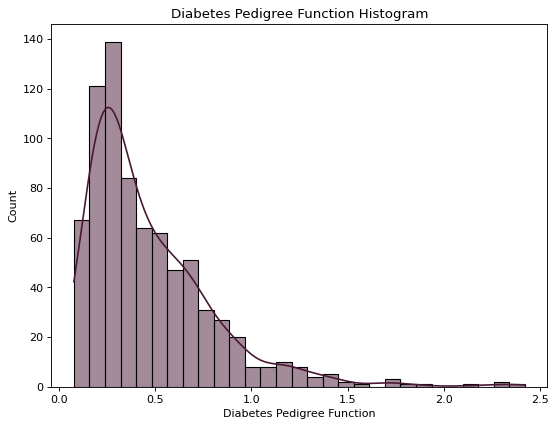

In [29]:
plt.figure(figsize=(8, 6), dpi=80)
sns.histplot(data = df, x='Diabetes Pedigree Function', color="#4a1936", kde=True)
plt.title('Diabetes Pedigree Function Histogram')
plt.show()

### Age

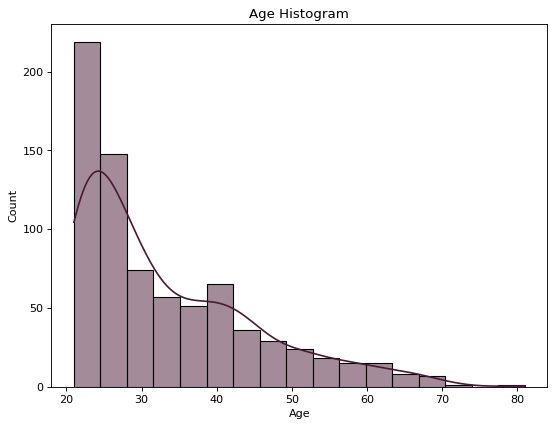

In [30]:
plt.figure(figsize=(8, 6), dpi=80)
sns.histplot(data = df, x='Age', color="#4a1936", kde=True)
plt.title('Age Histogram')
plt.show()

### Age vs Outcome

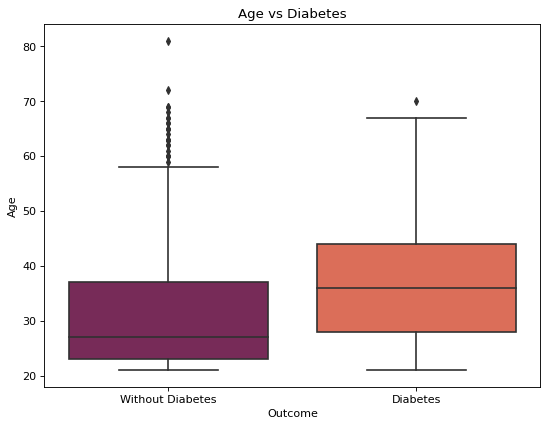

In [31]:
plt.figure(figsize=(8, 6), dpi=80)
sns.boxplot(data = df, x = 'Outcome', y = 'Age', palette='rocket').set_xticklabels(['Without Diabetes', 'Diabetes'])
plt.title('Age vs Diabetes')
plt.show()

Older people, especially those over 30, are more prone to diabetes

### Heatmap

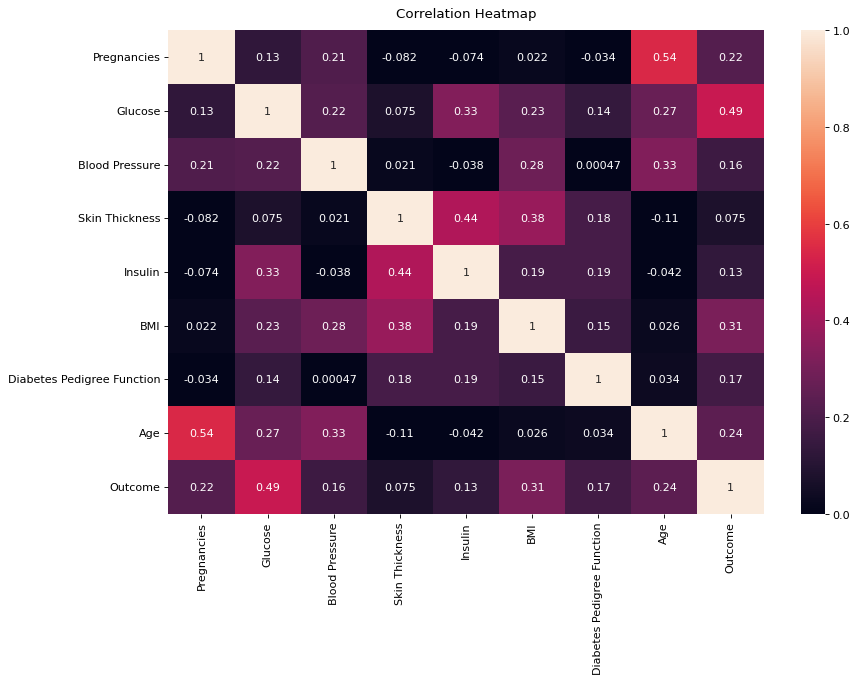

In [32]:
plt.figure(figsize=(12, 8), dpi=80)

heatmap = sns.heatmap(df.corr(), vmin=0, vmax=1, annot=True, cmap='rocket')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)
plt.show()

The strongest correlation exists between 'Outcome', and 'Glucose'

# Model

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler

In [34]:
X = df[['Pregnancies', 'Glucose', 'Blood Pressure', 'BMI', 'Age', 'Diabetes Pedigree Function', 'Insulin']]
y = df['Outcome']
X = StandardScaler().fit_transform(X)

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)

In [36]:
len(X_train)

614

In [37]:
len(X_test)

154

In [38]:
rfc = RandomForestClassifier(random_state=1)

In [39]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

rf_random = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

In [40]:
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   1.1s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1200; total time=   2.9s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1200; total time=   2.9s
[CV] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=2000; total time=   4.7s
[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=800; total time=   1.8s
[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=800; total time=   1.8s
[CV] END bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=1),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [41]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 10,
 'bootstrap': False}

In [42]:
rf_random.best_estimator_

RandomForestClassifier(bootstrap=False, max_depth=10, n_estimators=1000,
                       random_state=1)

In [43]:
rf = RandomForestClassifier(max_depth=70, min_samples_leaf=4, min_samples_split=10, n_estimators=400, random_state=1)

In [44]:
rf.fit(X_train, y_train)
print("Score: " + str(rf.score(X_test, y_test)))

Score: 0.8376623376623377


### Prediction

In [45]:
arr = np.array([[2, 101, 76, 37, 38, 0.220, 100]])
arr.reshape(-1, 1)

array([[  2.  ],
       [101.  ],
       [ 76.  ],
       [ 37.  ],
       [ 38.  ],
       [  0.22],
       [100.  ]])

In [46]:
rf.predict(arr)

array([1])

# Summing up

1. Diabetes is more common in women who have had more pregnancies
2. People with diabetes have much higher blood glucose levels
3. People with diabetes have slightly higher blood pressure
4. People with diabetes have a higher BMI
5. Older people, especially those over 30, are more prone to diabetes
6. The strongest relationship exists between the level of glucose in the blood and the occurrence of diabetes

In [47]:
def plot_figure(feature):
    plt.figure(figsize=(8, 6), dpi=80)
    sns.boxplot(data = df, x = 'Outcome', y = feature, palette='rocket').set_xticklabels(['Without Diabetes', 'Diabetes'])
    plt.title(feature +' vs Diabetes')
    plt.show()
    plt.clf()
    
features = ['Pregnancies', 'Glucose', 'Blood Pressure', 'BMI', 'Age']

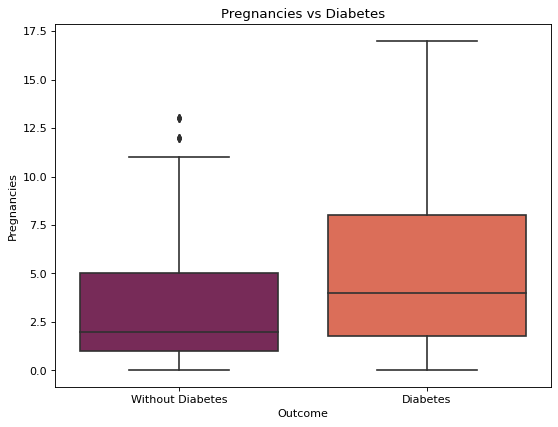

<Figure size 432x288 with 0 Axes>

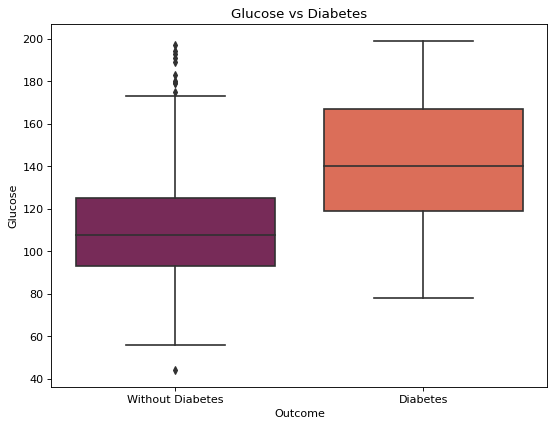

<Figure size 432x288 with 0 Axes>

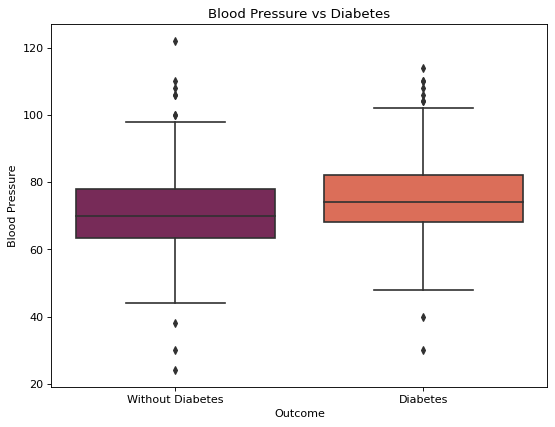

<Figure size 432x288 with 0 Axes>

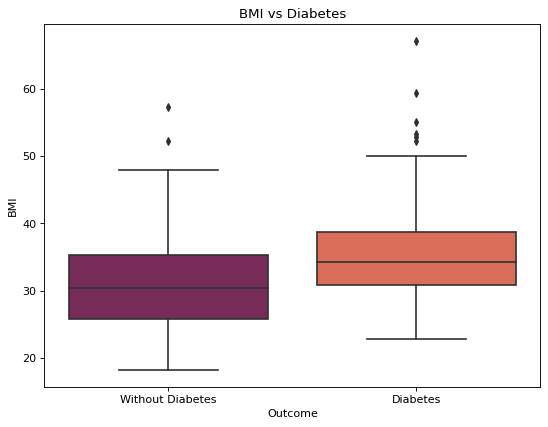

<Figure size 432x288 with 0 Axes>

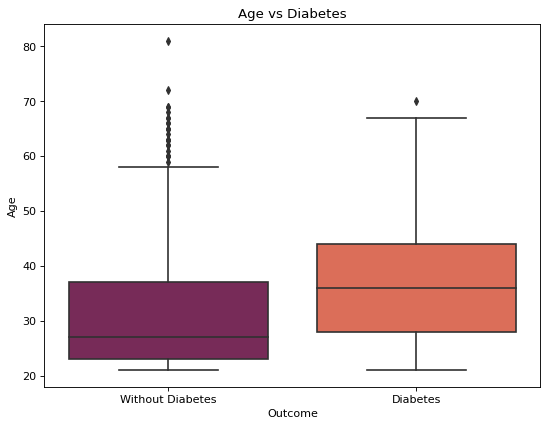

<Figure size 432x288 with 0 Axes>

In [48]:
for feature in features:
    plot_figure(feature)

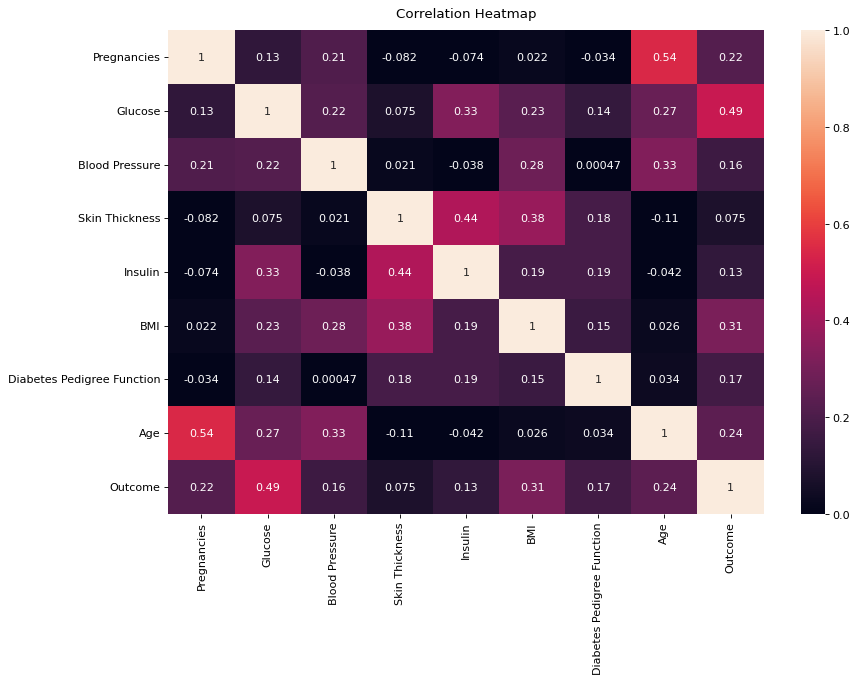

In [49]:
plt.figure(figsize=(12, 8), dpi=80)

heatmap = sns.heatmap(df.corr(), vmin=0, vmax=1, annot=True, cmap='rocket')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)
plt.show()